In [88]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import string
import re
from sklearn.metrics import accuracy_score, classification_report
from nltk.corpus import stopwords

In [89]:


# Initialize an empty list to store movie data
data = []

# Open the text file and read lines
with open('train_data.txt', 'r') as file:
    lines = file.readlines()
    for line in lines:
        # Split the line into components
        parts = line.strip().split(' ::: ')
        if len(parts) == 4:
            
            # Extract and clean data
            id_ = int(parts[0])
            title = parts[1].rsplit(' (', 1)[0]  # Extract title without the year
            genre = parts[2]
            plot = parts[3]
            
            # Append data as a dictionary
            data.append({
                "id": id_,
                "title": title,
                "plot": plot,
                "genre": genre
            })
            

# Convert the list of dictionaries to a DataFrame
df = pd.DataFrame(data)
df['title'] = df['title'].str.replace('"', '').str.replace('.', '')

df['plot'] = df['plot'].str.lower().str.replace(r'[^a-zA-Z0-9\s]', '', regex=True)

# Save the DataFrame to a CSV file
df.to_csv('movie_genres.csv', index=False)

print("CSV file has been created successfully.")


CSV file has been created successfully.


In [90]:


# Initialize an empty list to store movie data
data1 = []

# Open the text file and read lines
with open('test_data_solution.txt', 'r') as file:
    lines = file.readlines()
    for line in lines:
        # Split the line into components
        parts = line.strip().split(' ::: ')
        if len(parts) == 4:
            
            # Extract and clean data
            id_ = int(parts[0])
            title = parts[1].rsplit(' (', 1)[0]  # Extract title without the year
            plot = parts[3]
            
            # Append data as a dictionary
            data1.append({
                "id": id_,
                "title": title,
                "plot": plot
            })
            

# Convert the list of dictionaries to a DataFrame
df = pd.DataFrame(data1)
# df['title'] = df['title'].str.replace('"', '').str.replace('.', '')

# df['plot'] = df['plot'].str.lower().str.replace(r'[^a-zA-Z0-9\s]', '', regex=True)

# Save the DataFrame to a CSV file
df.to_csv('test_data.csv', index=False)

print("CSV file has been created successfully.")


CSV file has been created successfully.


In [99]:
testdata=pd.read_csv("test_data.csv")
testdata

,id,title,plot
0,1,Edgar's Lunch,"L.R. Brane loves his life - his car, his apart..."
1,2,La guerra de papá,"Spain, March 1964: Quico is a very naughty chi..."
2,3,Off the Beaten Track,One year in the life of Albin and his family o...
3,4,Meu Amigo Hindu,"His father has died, he hasn't spoken with his..."
4,5,Er nu zhai,Before he was known internationally as a marti...
...,...,...,...
54195,54196,"""Tales of Light & Dark""","Covering multiple genres, Tales of Light & Dar..."
54196,54197,Der letzte Mohikaner,As Alice and Cora Munro attempt to find their ...
54197,54198,Oliver Twink,"A movie 169 years in the making. Oliver Twist,..."
54198,54199,Slipstream,"Popular, but mysterious rock D.J Mike Mallard ..."


In [92]:
data=pd.read_csv("movie_genres.csv")
data

,id,title,plot,genre
0,1,Oscar et la dame rose,listening in to a conversation between his doc...,drama
1,2,Cupid,a brother and sister with a past incestuous re...,thriller
2,3,"Young, Wild and Wonderful",as the bus empties the students for their fiel...,adult
3,4,The Secret Sin,to help their unemployed father make ends meet...,drama
4,5,The Unrecovered,the films title refers not only to the unrecov...,drama
...,...,...,...,...
54209,54210,Bonino,this shortlived nbc live sitcom centered on bo...,comedy
54210,54211,Dead Girls Don't Cry,the next generation of exploitation the sister...,horror
54211,54212,Ronald Goedemondt: Ze bestaan echt,ze bestaan echt is a standup comedy about grow...,documentary
54212,54213,Make Your Own Bed,walter and vivian live in the country and have...,comedy


In [93]:
data.head(50)

,id,title,plot,genre
0,1,Oscar et la dame rose,listening in to a conversation between his doc...,drama
1,2,Cupid,a brother and sister with a past incestuous re...,thriller
2,3,"Young, Wild and Wonderful",as the bus empties the students for their fiel...,adult
3,4,The Secret Sin,to help their unemployed father make ends meet...,drama
4,5,The Unrecovered,the films title refers not only to the unrecov...,drama
5,6,Quality Control,quality control consists of a series of 16mm s...,documentary
6,7,Pink Slip,in tough economic times max and joey have all ...,comedy
7,8,One Step Away,ron petrie keanu reeves is a troubled teen who...,crime
8,9,Desperate Hours,a sudden calamitous event causing great loss o...,reality-tv
9,10,Spirits,four high school students embark on a terrifyi...,horror


/tmp/ipykernel_3817/1438568179.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, y='genre', order=data['genre'].value_counts().index, palette='viridis')


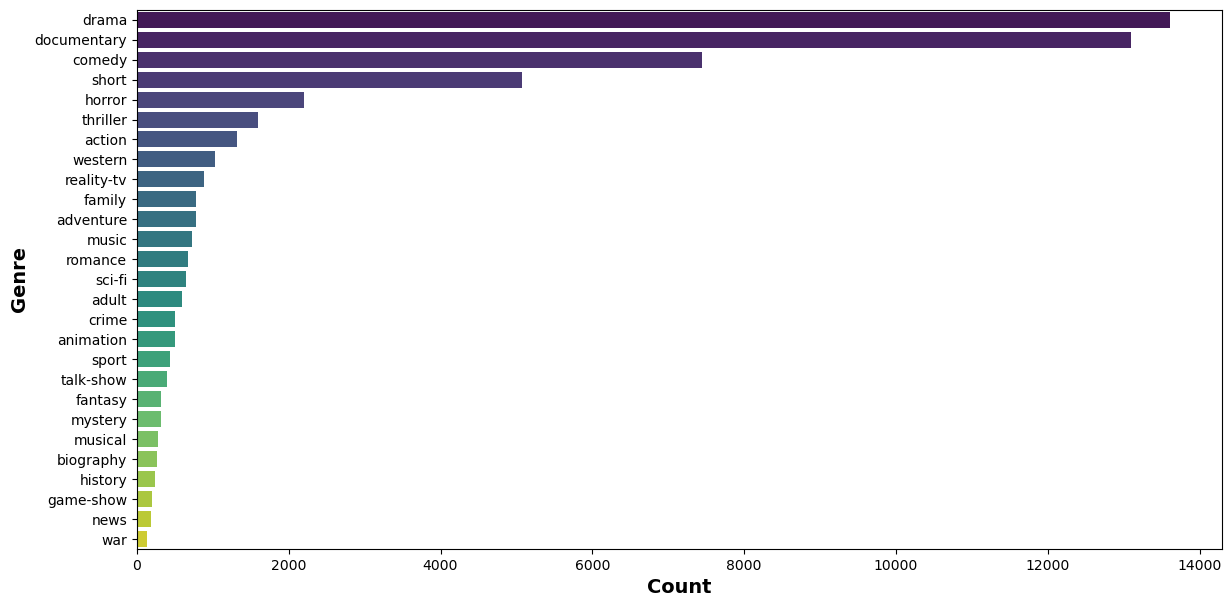

In [94]:


# Plot the distribution of genres in the training data
plt.figure(figsize=(14, 7))
sns.countplot(data=data, y='genre', order=data['genre'].value_counts().index, palette='viridis')
plt.xlabel('Count', fontsize=14, fontweight='bold')
plt.ylabel('Genre', fontsize=14, fontweight='bold')
plt.show()

/tmp/ipykernel_3817/3453677872.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts, palette='viridis')


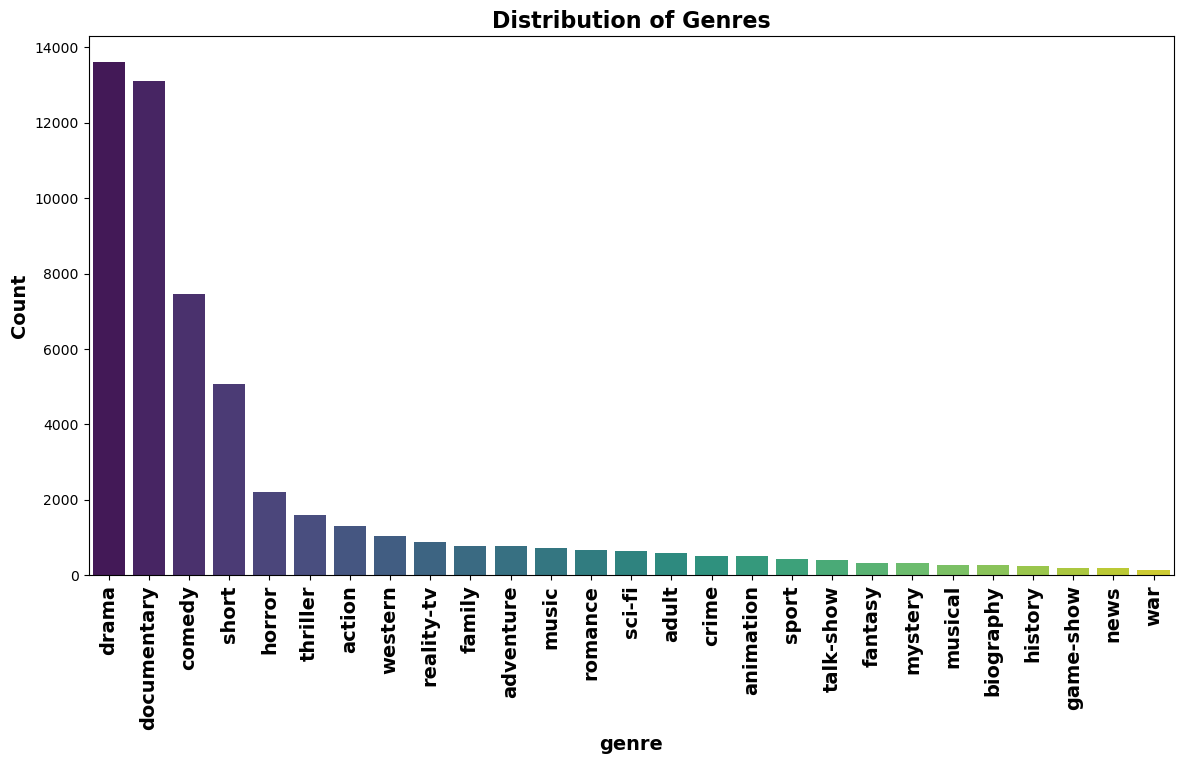

In [95]:
# Plot the distribution of genres using a bar plot
plt.figure(figsize=(14, 7))
counts = data['genre'].value_counts()
sns.barplot(x=counts.index, y=counts, palette='viridis')
plt.xlabel('genre', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.title('Distribution of Genres', fontsize=16, fontweight='bold')
plt.xticks(rotation=90, fontsize=14, fontweight='bold')
plt.show()


In [97]:

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# Initialize the stemmer and stop words
stemmer = LancasterStemmer()
stop_words = set(stopwords.words('english'))

# Define the clean_text function
def clean_text(text):
    text = text.lower()  # Lowercase all characters
    text = re.sub(r'@\S+', '', text)  # Remove Twitter handles
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'pic.\S+', '', text)  # Remove URLs starting with 'pic'
    text = re.sub(r"[^a-zA-Z+']", ' ', text)  # Keep only characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text + ' ')  # Keep words with length > 1 only
    text = "".join([i for i in text if i not in string.punctuation])
    words = nltk.word_tokenize(text)
    words = [i for i in words if i not in stop_words and len(i) > 2]  # Remove stopwords
    text = " ".join(words)
    text = re.sub("\s[\s]+", " ", text).strip()  # Remove repeated/leading/trailing spaces
    return text

# Assuming train_data and test_data are your dataframes
data['Text_cleaning'] = data['plot'].apply(clean_text)
testdata['Text_cleaning'] = testdata['plot'].apply(clean_text)



<>:21: SyntaxWarning: invalid escape sequence '\s'
<>:21: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_3817/1282636542.py:21: SyntaxWarning: invalid escape sequence '\s'
  text = re.sub("\s[\s]+", " ", text).strip()  # Remove repeated/leading/trailing spaces
[nltk_data] Downloading package punkt to /home/pruthviraj/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/pruthviraj/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [100]:
testdata

,id,title,plot
0,1,Edgar's Lunch,"L.R. Brane loves his life - his car, his apart..."
1,2,La guerra de papá,"Spain, March 1964: Quico is a very naughty chi..."
2,3,Off the Beaten Track,One year in the life of Albin and his family o...
3,4,Meu Amigo Hindu,"His father has died, he hasn't spoken with his..."
4,5,Er nu zhai,Before he was known internationally as a marti...
...,...,...,...
54195,54196,"""Tales of Light & Dark""","Covering multiple genres, Tales of Light & Dar..."
54196,54197,Der letzte Mohikaner,As Alice and Cora Munro attempt to find their ...
54197,54198,Oliver Twink,"A movie 169 years in the making. Oliver Twist,..."
54198,54199,Slipstream,"Popular, but mysterious rock D.J Mike Mallard ..."


In [ ]:
data.Text_cleaning.head(50)

In [ ]:


# Calculate the length of cleaned text
data['length_Text_cleaning'] = data['Text_cleaning'].apply(len)
# Visualize the distribution of text lengths
plt.figure(figsize=(8, 7))
sns.histplot(data=data, x='length_Text_cleaning', bins=20, kde=True, color='blue')
plt.xlabel('Length', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.title('Distribution of Lengths', fontsize=16, fontweight='bold')
plt.show()



In [104]:
data

,id,title,plot,genre,Text_cleaning
0,1,Oscar et la dame rose,listening in to a conversation between his doc...,drama,listening conversation doctor parents yearold ...
1,2,Cupid,a brother and sister with a past incestuous re...,thriller,brother sister past incestuous relationship cu...
2,3,"Young, Wild and Wonderful",as the bus empties the students for their fiel...,adult,bus empties students field trip museum natural...
3,4,The Secret Sin,to help their unemployed father make ends meet...,drama,help unemployed father make ends meet edith tw...
4,5,The Unrecovered,the films title refers not only to the unrecov...,drama,films title refers unrecovered bodies ground z...
...,...,...,...,...,...
54209,54210,Bonino,this shortlived nbc live sitcom centered on bo...,comedy,shortlived nbc live sitcom centered bonino wor...
54210,54211,Dead Girls Don't Cry,the next generation of exploitation the sister...,horror,next generation exploitation sisters kapa bay ...
54211,54212,Ronald Goedemondt: Ze bestaan echt,ze bestaan echt is a standup comedy about grow...,documentary,bestaan echt standup comedy growing facing fea...
54212,54213,Make Your Own Bed,walter and vivian live in the country and have...,comedy,walter vivian live country difficult time keep...


In [111]:
X = data['Text_cleaning']
y = data['genre']

In [107]:
data['Text_cleaning'] = data['plot'].apply(clean_text)
testdata['Text_cleaning'] = testdata['plot'].apply(clean_text)

In [112]:
# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X)

# Transform the test data
X_test_tfidf = tfidf_vectorizer.transform(testdata['Text_cleaning'])

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_tfidf, y, test_size=0.2, random_state=42)

In [113]:
# Initialize and train a Multinomial Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = classifier.predict(X_val)

# Evaluate the performance of the model
accuracy = accuracy_score(y_val, y_pred)
print("Validation Accuracy:", accuracy)
print(classification_report(y_val, y_pred))


Validation Accuracy: 0.44544867656552617
              precision    recall  f1-score   support

      action       0.00      0.00      0.00       263
       adult       0.00      0.00      0.00       112
   adventure       0.00      0.00      0.00       139
   animation       0.00      0.00      0.00       104
   biography       0.00      0.00      0.00        61
      comedy       0.68      0.04      0.07      1443
       crime       0.00      0.00      0.00       107
 documentary       0.54      0.90      0.67      2659
       drama       0.38      0.88      0.53      2697
      family       0.00      0.00      0.00       150
     fantasy       0.00      0.00      0.00        74
   game-show       0.00      0.00      0.00        40
     history       0.00      0.00      0.00        45
      horror       0.00      0.00      0.00       431
       music       0.00      0.00      0.00       144
     musical       0.00      0.00      0.00        50
     mystery       0.00      0.00      0

/home/pruthviraj/.config/jupyterlab-desktop/jlab_server/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/pruthviraj/.config/jupyterlab-desktop/jlab_server/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/pruthviraj/.config/jupyterlab-desktop/jlab_server/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th

In [114]:
X_train

<43371x145412 sparse matrix of type '<class 'numpy.float64'>'
	with 2091995 stored elements in Compressed Sparse Row format>

In [117]:
# Given text
new_text = """As the bus empties the students for their field trip to the Museum of Natural History, little does the tour guide suspect that the students are there for more than just another tour. First, during the lecture films, the coeds drift into dreams of the most erotic fantasies one can imagine. After the films, they release the emotion of the fantasies in the most erotic and uncommon ways. One slips off to the curator's office for a little "acquisition. " Another finds the anthropologist to see what bones can be identified. Even the head teacher isn't immune. Soon the tour is over, but as the bus departs, everyone admits it was quite an education."""

# Preprocess the new text
cleaned_new_text = clean_text(new_text)

# Transform the preprocessed text using the TF-IDF vectorizer
new_text_tfidf = tfidf_vectorizer.transform([cleaned_new_text])

# Make a prediction using the trained classifier
predicted_genre = classifier.predict(new_text_tfidf)

# Output the predicted genre
print("Predicted Genre:", predicted_genre[0])


Predicted Genre: drama
